In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
mybl_lang = pd.read_csv('mybl_lang.csv')
mybl_lang = mybl_lang.loc[mybl_lang['name'] != 'Swift']
mybl_lang.drop('id', axis=1, inplace=True)

In [3]:
langs = mybl_lang.pivot(index='date_added', columns='name', values=['val', 'val_noexp', 'res_vac'])
langs.dropna(inplace=True)

In [4]:
Mind = pd.MultiIndex.from_tuples([('res', i) for i in langs['val'].columns])
langs_res = langs['res_vac'] * langs['val']
langs_res.columns = Mind
langs = pd.merge(langs, langs_res, how='left', on='date_added')

In [5]:
#normalization
for i in langs.columns:
    langs[i] = langs[i]/(max(langs[i]))

langs.describe()

val                                                        \
                1c         ABAP      Android Data scientist       DevOps   
count  1349.000000  1349.000000  1349.000000    1349.000000  1349.000000   
mean      0.775886     0.378540     0.507569       0.698791     0.641642   
std       0.111059     0.261459     0.230937       0.146415     0.116083   
min       0.556527     0.105000     0.218731       0.413926     0.398362   
25%       0.670726     0.180000     0.334743       0.572534     0.548771   
50%       0.765153     0.240000     0.392145       0.725338     0.620253   
75%       0.870182     0.655000     0.764955       0.820116     0.719285   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

                                                                        ...  \
          Frontend       Golang         Java   Javascript       Python  ...   
count  1349.000000  1349.000000  1349.000000  1349.000000  1349.000000  ...   
mean      0.531538     0.742358     0.553969     0.532366     0.635139  ...   
std       0.217463     0.135587     0.188442     0.214447     0.135682  ...   
min       0.282471     0.473684     0.291237     0.300840     0.407917  ...   
25%       0.372104     0.626486     0.417966     0.371735     0.545611  ...   
50%       0.403230     0.733447     0.471996     0.409515     0.580895  ...   
75%       0.769951     0.872666     0.748078     0.778451     0.722031  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               res                                                      \
            Golang         Java   Javascript       Python         Ruby   
count  1349.000000  1349.000000  1349.000000  1349.000000  1349.000000   
mean      0.401302     0.657716     0.712950     0.586993     0.758903   
std       0.233780     0.153390     0.131653     0.213720     0.104805   
min       0.103687     0.421005     0.483455     0.251533     0.608267   
25%       0.163924     0.494843     0.589239     0.360557     0.655936   
50%       0.364055     0.658095     0.726053     0.599193     0.753820   
75%       0.570688     0.779283     0.813371     0.778819     0.842366   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                        
             Scala          cpp           cs          iOS          php  
count  1349.000000  1349.000000  1349.000000  1349.000000  1349.000000  
mean      0.721529     0.660867     0.715981     0.682108     0.717953  
std       0.130051     0.145607     0.131993     0.173918     0.106829  
min       0.485830     0.451396     0.498347     0.403434     0.571868  
25%       0.619433     0.522763     0.573068     0.497477     0.617487  
50%       0.736589     0.645787     0.733991     0.705657     0.706679  
75%       0.807692     0.780575     0.828087     0.826839     0.798863  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 64 columns]

([<matplotlib.axis.XTick at 0x2b9354fec10>,
 [Text(281.0, 0, '2022-01-01'), Text(646.0, 0, '2023-01-01')])

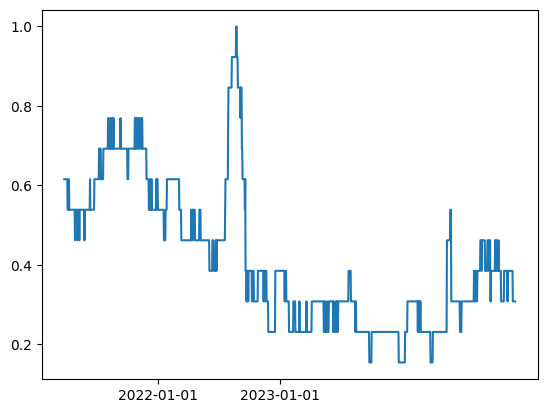

In [6]:
plt.plot(langs["val_noexp", "cpp"])
plt.xticks(['2022-01-01', '2023-01-01'])

In [7]:
def derivative(column, window):
    colmns = langs[column].columns

    langs1 = langs[column].copy()
    langs2 = langs[column].copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')
    #colmns = langs1.iloc[0].sort_values(ascending=False).index

C:\Users\ksn\AppData\Local\Temp\ipykernel_10520\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


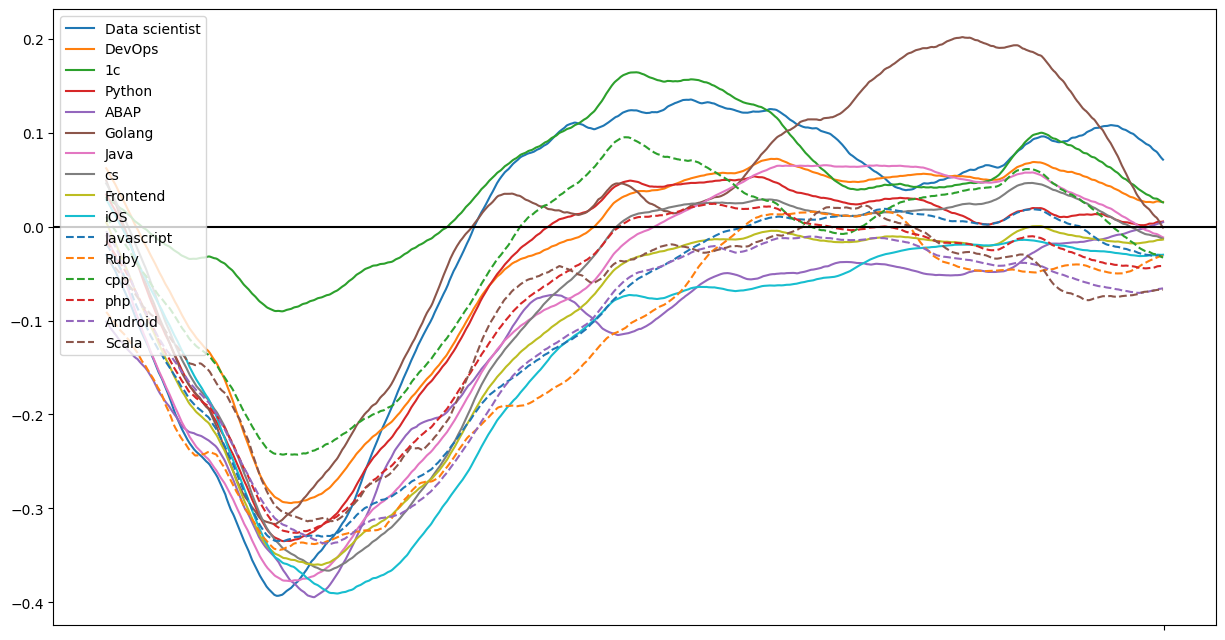

In [8]:
derivative('val', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_10520\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


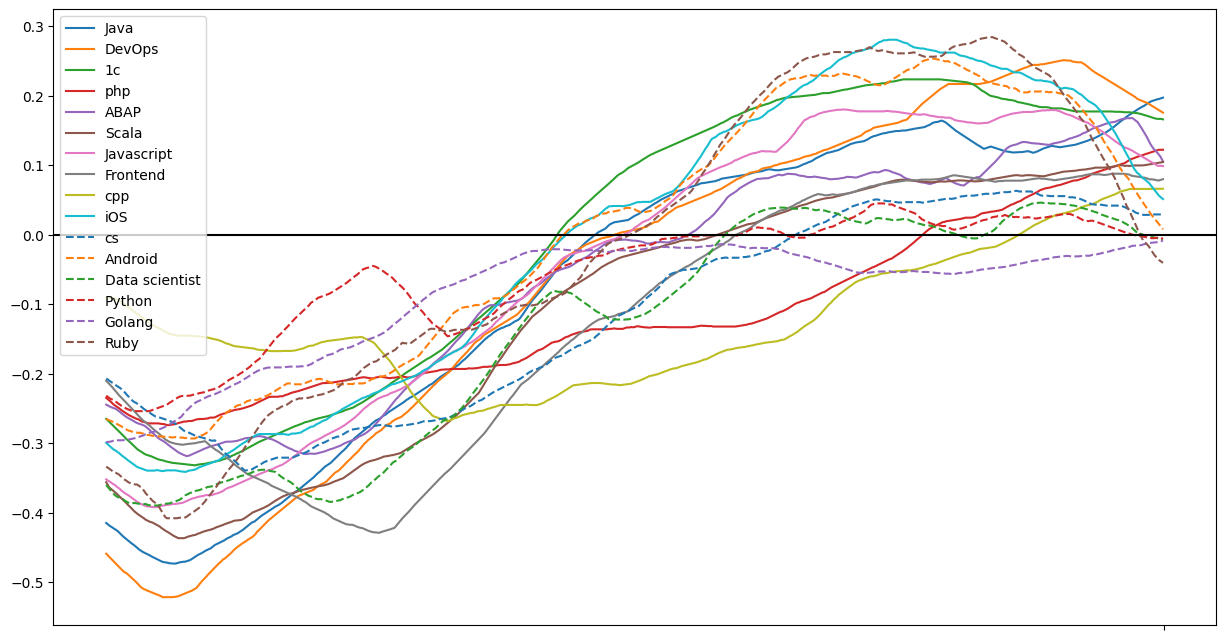

In [9]:
derivative('val_noexp', 300)

C:\Users\ksn\AppData\Local\Temp\ipykernel_10520\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


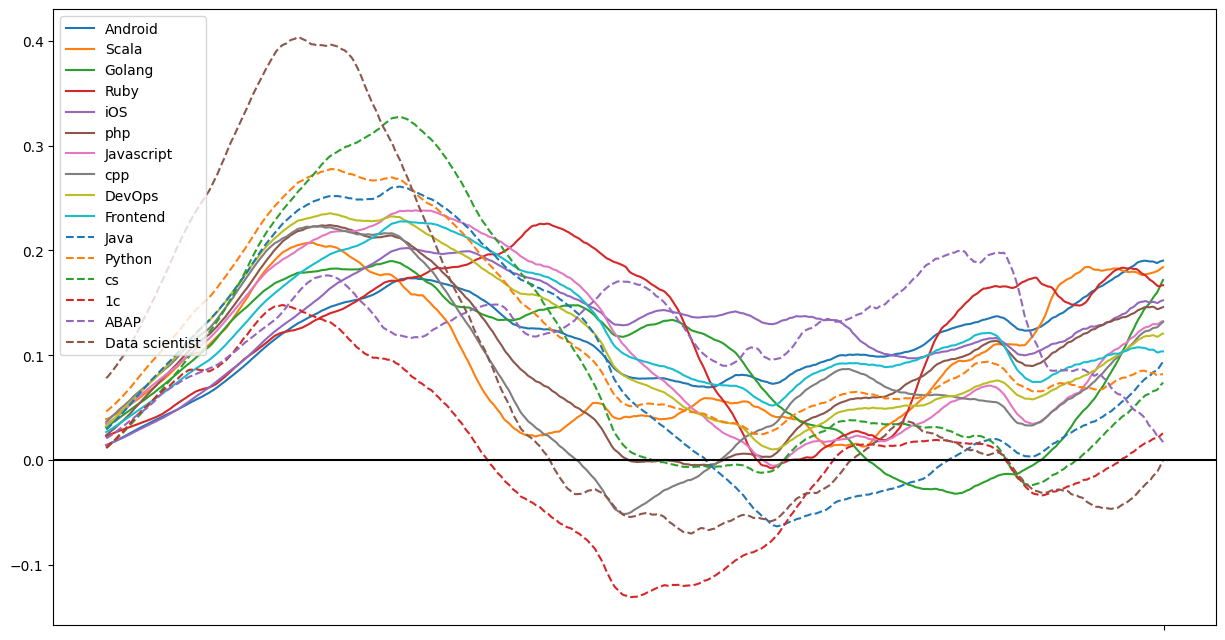

In [10]:
derivative('res_vac', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_10520\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


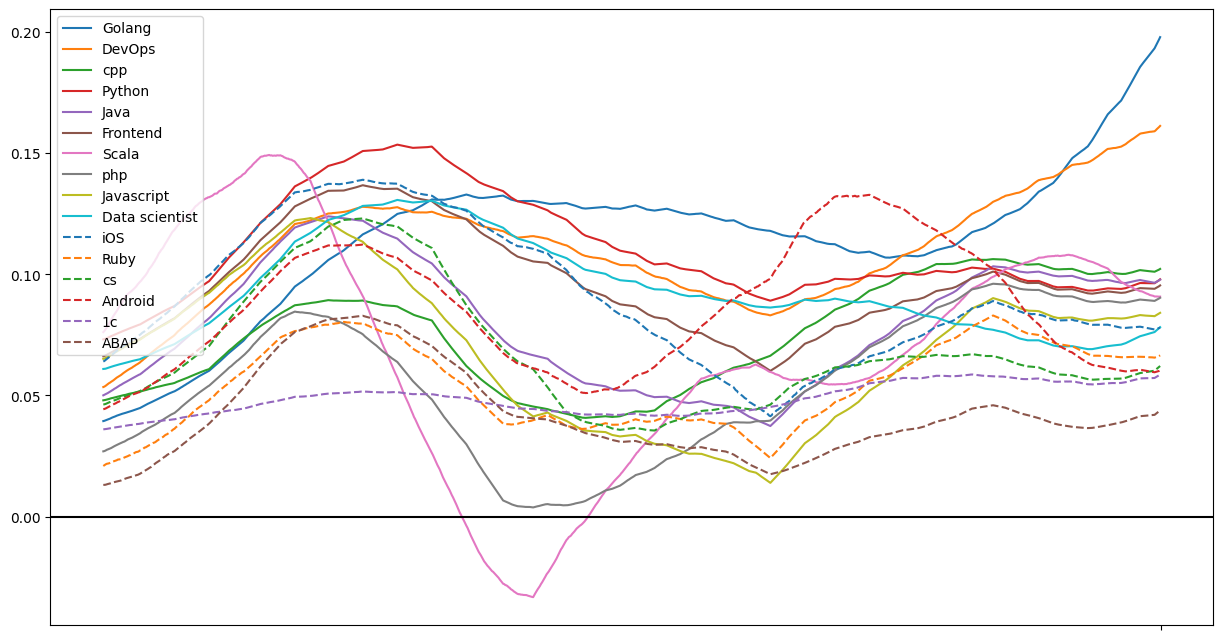

In [11]:
derivative('res', 200)

In [12]:
import seaborn as sns

def corr_matrix(colmns):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0)
    sns.heatmap(pd.DataFrame(langs[colmns]).corr(),cmap='GnBu',annot=True)

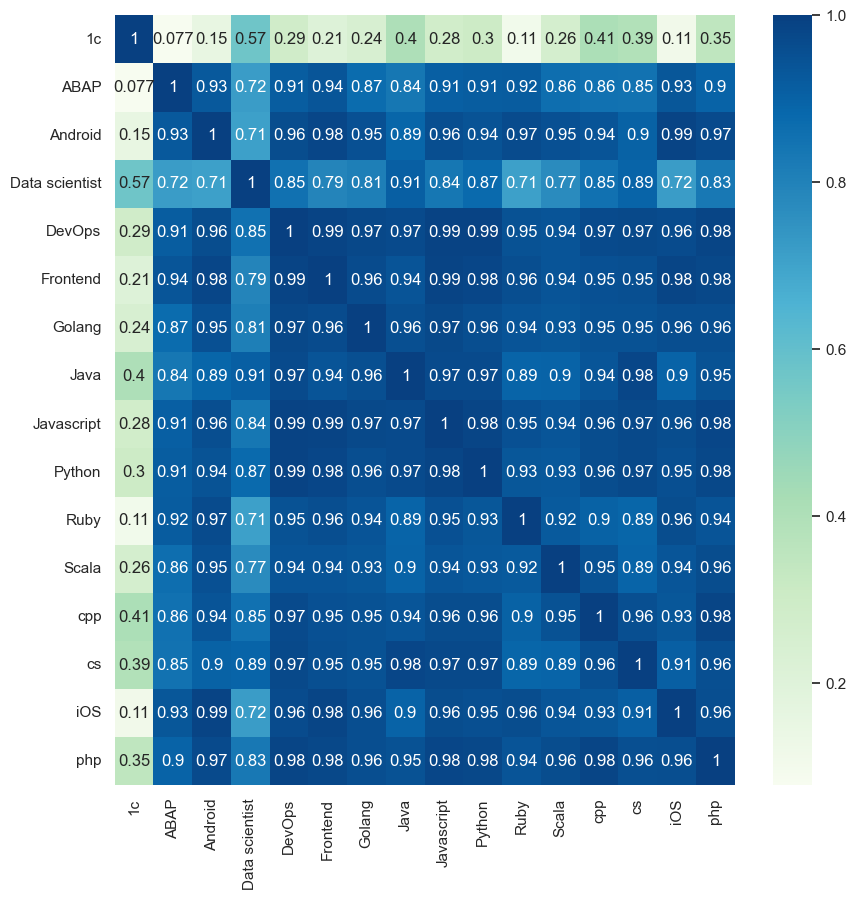

In [13]:
corr_matrix('res_vac')

In [14]:
langs.index = pd.to_datetime(langs.index)

def year(x):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    plt.plot(langs[x].groupby(langs.index.strftime('%m-%d')).median().median(axis=1))
    plt.xticks([str(i).zfill(2) + "-01" for i in range(1, 13)])
    plt.grid()

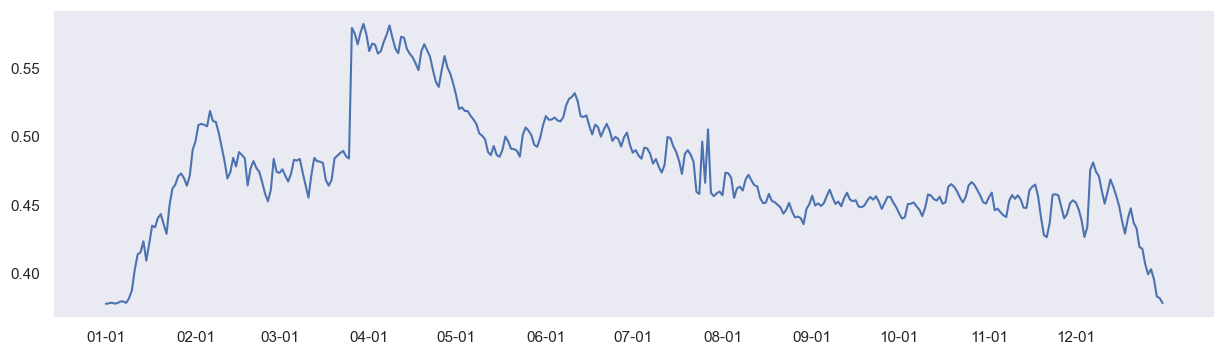

In [15]:
year("val")

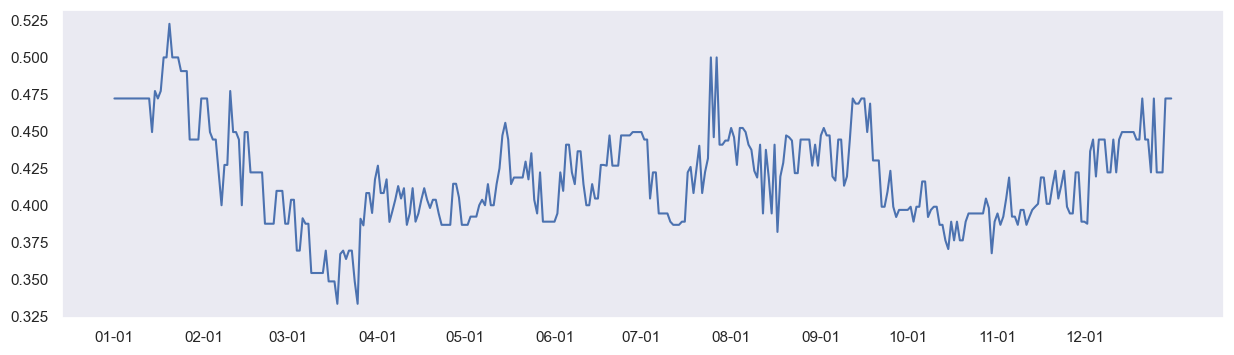

In [16]:
year("val_noexp")

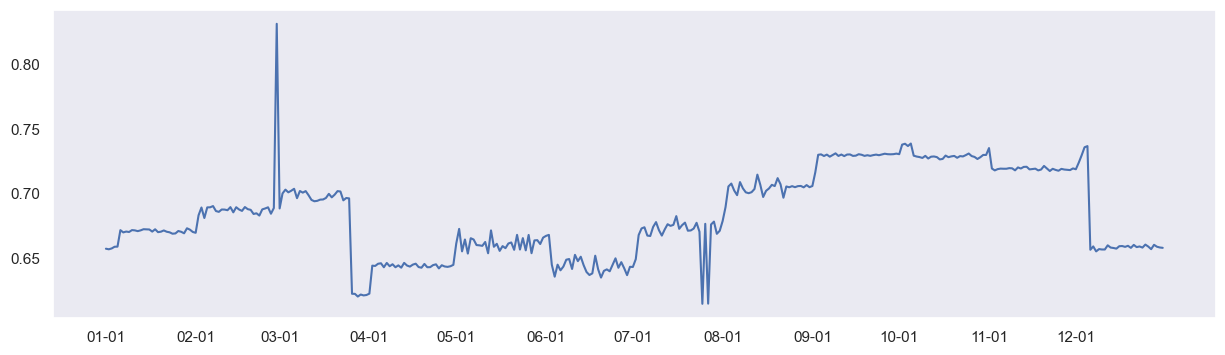

In [17]:
year("res")

In [18]:
def normalize(column, window):
    langs1 = langs[column].copy()
    colmns = langs1.iloc[0].sort_values(ascending=False).index

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels = []

    for i, c in enumerate(colmns):
        langs1[c] = langs1[c].rolling(window=window).mean()

        if i < 10:
            ax.plot(langs1[c])
            labels.append(langs1[c].name)
        else:
            ax.plot(langs1[c], linestyle='--')
            labels.append(langs1[c].name)

    ax.legend(labels)

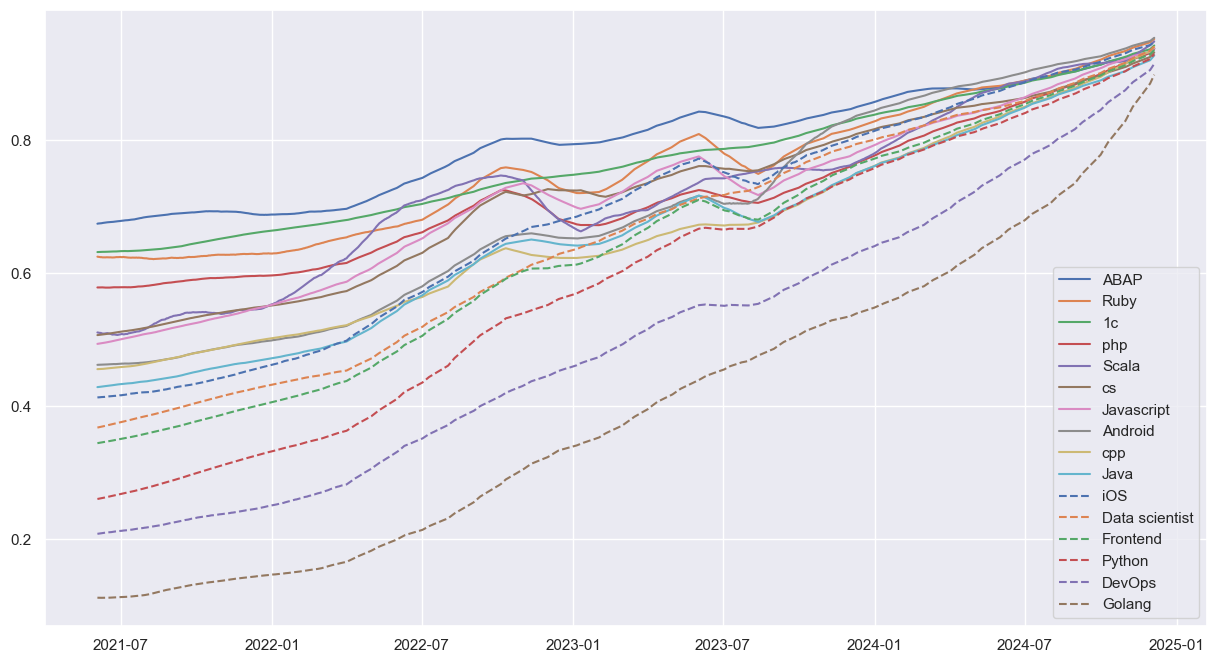

In [19]:
normalize("res", 70)

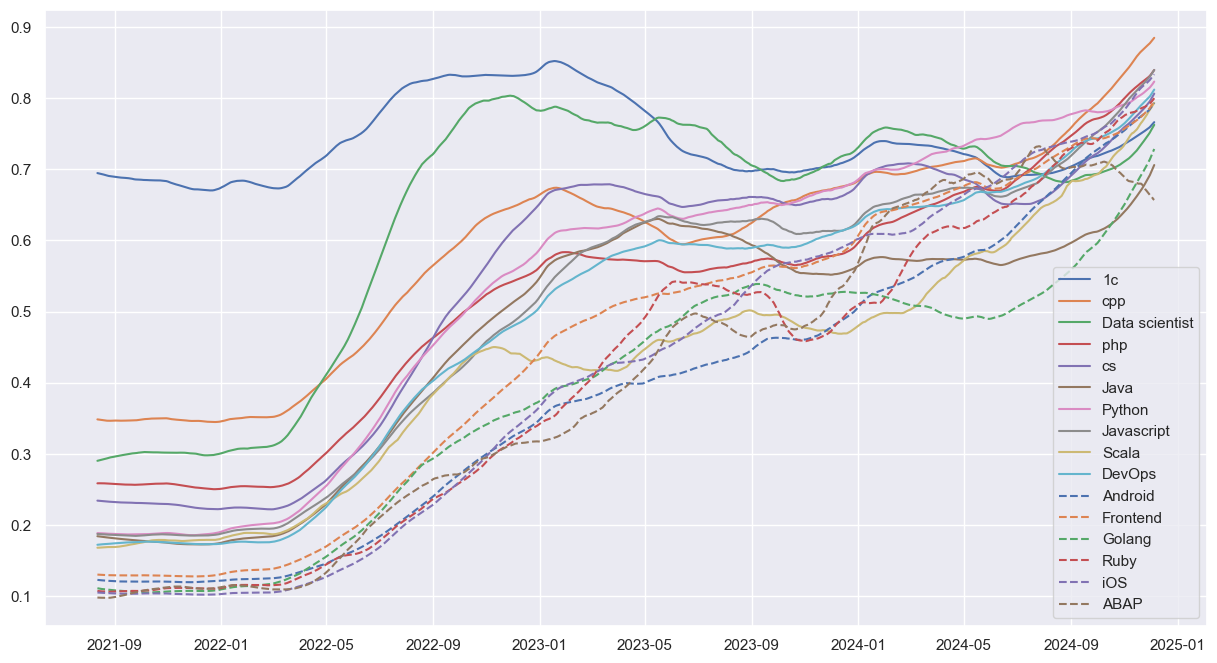

In [21]:
normalize("res_vac", 140)